# APS 1 - TRANSFERÊNCIA DE CALOR

- Lorran Lopes
- Letícia Coelho
- Lídia Alves

Esta aps tem como objetivo analisar o comportamento térmico de uma aleta tipo pino construída em Alumínio. A geometria dada para o grupo foi tal que:

<img src = "aleta_img.png">

<img src = "condicoes.png">

#### Importando bibliotecas consideradas essenciais:

In [126]:
from math import *
import numpy as np
import matplotlib.pyplot as plt 

### Questão 1

#### Declarando parâmetros e funções: 

In [127]:
# Condições Iniciais

# Comprimento da aleta (em m)
L = 0.15

# Diâmetro e raio da aleta (em m)
D = 0.24
R = D/2

# Perímetro da aleta (em m)
P = 2*pi*R

# Área transversal da aleta (em m^2)
Atr = (pi*D**2)/4

# Área da superfície da aleta (em m^2)
A = Atr + 2*pi*L*R

# Coeficiente de convecção térmica (em W/m^2K)
h = 25

# Coeficiente de condutividade térmica no Alumínio (em W/m.K)
k = 240

# Temperatura ambiente (em K)
Tamb = 25 + 273

# Temperatura da base (em K)
Tb = 100 + 273

In [128]:
def calc_m(h, P, k, Atr):
    m = sqrt(h * P/(k * Atr))
    return m

def calc_M(h, P, k, Atr, Tb, Tamb):
    tetab = Tb - Tamb
    M = tetab*sqrt(h * P * k * Atr)
    return M

def dist_temperatura(h, P, k, Atr, L, Tb, Tamb, x):
    m = calc_m(h, P, k, Atr)
    dist = (cosh(m * (L - x)) + (h / (m * k))*sinh(m * (L - x))) / (cosh(m * L) + (h / (m * k))*sinh(m * L))
    tetab = Tb - Tamb
    TL = dist*(tetab) + Tamb
    return TL

def transf_calor(h, P, k, Atr, L, Tb, Tamb):
    m = calc_m(h, P, k, Atr)
    M = calc_M(k, P, k, Atr, Tb, Tamb)
    transf = M * ((sinh(m * L) + (h / (m * k))*cosh(m * L))/(cosh(m * L) + (h / (m * k))*sinh(m * L)))
    return transf

#### Obtendo o gráfico da distribuição da temperatura de x = 0 até x = L

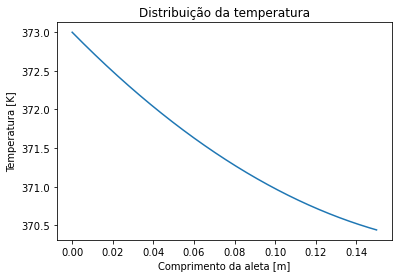

In [129]:
lista_T = []
lista_x = np.arange(0,L,1e-5)

for x in lista_x:
    lista_T.append(dist_temperatura(h, P, k, Atr, L, Tb, Tamb, x))

plt.title("Distribuição da temperatura")
plt.plot(lista_x, lista_T)
plt.xlabel("Comprimento da aleta [m]")
plt.ylabel("Temperatura [K]")
plt.show()

#### Temperatura na extremidade da aleta

In [130]:
print(f"A temperatura na extremidade da aleta é de {lista_T[-1]:.2f} K")

A temperatura na extremidade da aleta é de 370.44 K


#### Taxa de transferência de calor na aleta

In [131]:
transf = transf_calor(h, P, k, Atr, L, Tb, Tamb)
print(f"A taxa de transferência de calor na aleta é de {transf:.2f} W")

A taxa de transferência de calor na aleta é de 897.58 W


#### Eficiência e efetividade da aleta

In [132]:
tetab = Tb - Tamb
efic = transf / (A * h * tetab)
efet = transf / (Atr * tetab * h)
print(f"A eficiência na aleta é de {efic*100:.2f}% e a efetividade é de {efet:.2f}.")

A eficiência na aleta é de 302.34% e a efetividade é de 10.58.


#### Taxa de transferência de calor assumindo a hipótese da aleta infinita

In [133]:
taxa_inf = calc_M(h, P, k, Atr, Tb, Tamb)
print(f"A taxa de transferência de calor assumindo a hipótese infinita é de: {taxa:.2f} W")

A taxa de transferência de calor assumindo a hipótese infinita é de: 1072.94 W


In [134]:
print("Ocorreu uma diferença, o que era esperado, já que com maior comprimento da aleta, maior taxa de transferência ela vai ter até chegar ao limite.")

Ocorreu uma diferença, o que era esperado, já que com maior comprimento da aleta, maior taxa de transferência ela vai ter até chegar ao limite.


#### Comprimento da aleta para a medida precisa da taxa de transferência

In [139]:
# Considerando uma tolerância de 1%
TOL = 0.01
lista_transf = []
lista_x2 = np.arange(0,20,1e-6)
for x in lista_x2:
    lista_transf.append(transf_calor(h, P, k, Atr, x, Tb, Tamb))

indice = 0

for i in range(0,len(lista_transf)):
    if abs(lista_transf[i] - taxa_inf) < TOL:
        indice = i

In [140]:
print(f"Portanto, o comprimento da aleta para a taxa de transferência ser precisa é {lista_x2[indice]:.4f} m, ou seja, {lista_x2[indice]*1000:.2f} mm")

Portanto, o comprimento da aleta para a taxa de transferência ser precisa é 0.1939 m, ou seja, 193.91 mm
